# Inventory Management System
- An inventory management system is designed to efficiently track, manage, and optimize product inventory withing a business. The system needs to handle multiple products, track stock levels, process orders, and ensure timely replenishment. The system should be able to accommodate different product types, handles various inventory operations, and provide accurate report.

## Rules of the system:
- Setup:
    - The business has multiple warehouses and can store multiple product types
    - Products can be added, removed, or transferred between warehouses.
    - Each product has attributes like SKU (Stock keeping unit - UniqueId of a product), name, price, quantity
    - The system tracks inventory levels and triggers alerts for low stocks.
- Operation:
    - Users can add new products to the inventory.
    - Stock levels are updated when products are recived or shipped.
    - The system generates reports on inventory status and movement.
    - Inventory can be searched and filtered based on various criteria
- Safety Features
    - Threshold alerts prevent stockouts
    - Audit trails track all inventory changes.
    - Access control limits who can perform different inventory operations.

## Interview Settings
### Point 1: Intro and vague problem statement
- Interviewer: Desivgn an inventory management system
- Candidate: Here's my understanding of the Inventory Management system
    - The system will manage multiple products across different warehouses.
    - Users can add, remove, and transfer inventory items.
    - The system tracks stock levels and alerts on low inventory.
    - Reports can be generated for inventory analysis.
    - The system should be scalable to handle businesses of different sizes.
- Is this the expected flow
- Interviewer" We are aligned with the flow. Please continue ahead.
- Candidate: I'd like ao clarify a few requirements
    - What types of products should the system support?
    - Are there specific inventory replenishment (restoration of stock) strategies to implement?
    - How shoule the system handle product categories?
### Point 2: Clarifying requirements
- Interviwer: We want a system that:
    - Supports multiple product types in multiple warehouses.
    - Handles both inventory additions and removals.
    - Efficiently notifies when stock levels are low.
- Candidate: To summarize, the key requirements are:
    - A system with multiple warehoueses and product categories.
    - Stock level tracking and management.
    - Intelligent replenishment strategy implementation.
    - Ability to handle edge cases like damaged inventory or returns.
- Interviewer: Let's proceed..
### Point 3: Identify key components/Entities
- Candidate: Let's identify the key components of our inventory Management system:
    1. Product: Represents individual products in inventory
    2. Warehouse: contains prodcuts and manages storage.
    3. InventoryManager: Manages inventory operations and tracking.
### Point 4: Design challenge
- Interviewer: What design challenegs do we aniticipate?
- Candidate The key challenges for the inventory management system include:
    1. Scalability: Handling large numbers of products and warehouses.
    2. Concurrency: Managing multiple simultaneous inventory operations.
    3. Data consistency: Ensuring accurate inventory counts across the system.
    4. Customizable Replenishment: Supporting different replenishment strategies.
    5. Edge Cases: Handling product returns, damaged inventory, and seasonal demand fluctuations.
### Point 5: Approach
- Interviewer: How would we approach these challenges?
- Candidate: I propose using design patterns effectively.
    1. Singleton Pattern for Inventory Manager:
        - Ensures a single point of control for inventory operations.
    2. Observer Pattern for inventory alerts
        - Notifies relevant stakeholders when stock falls below thresholds.
        - Enables real-time inventory monitoring
    3. Factory Pattern for product Creation
        - Encapsulates product creation logic
        - Allows for easy addition of new product types
    4. Strategy pattern for Replenishment:
        - Enables different replenishment strategies
        - Can switch between algorithms based on product type or season.
    5. State Management with Enums
        - To effectively manage product categories and operations, we'll use enums

In [18]:
from enum import Enum

class ProductCategory:
    ELECTRONICS = 'ELECTRONICS'
    CLOTHING = 'CLOTHING'
    GROCERY = 'GROCERY'
    FURNITURE = 'FURNITURE'
    OTHER = 'OTHER'

### Point 6: Implementation
- Candidate: I'll focus on implementing the design patterns and show how they work together in the inventory management system
- 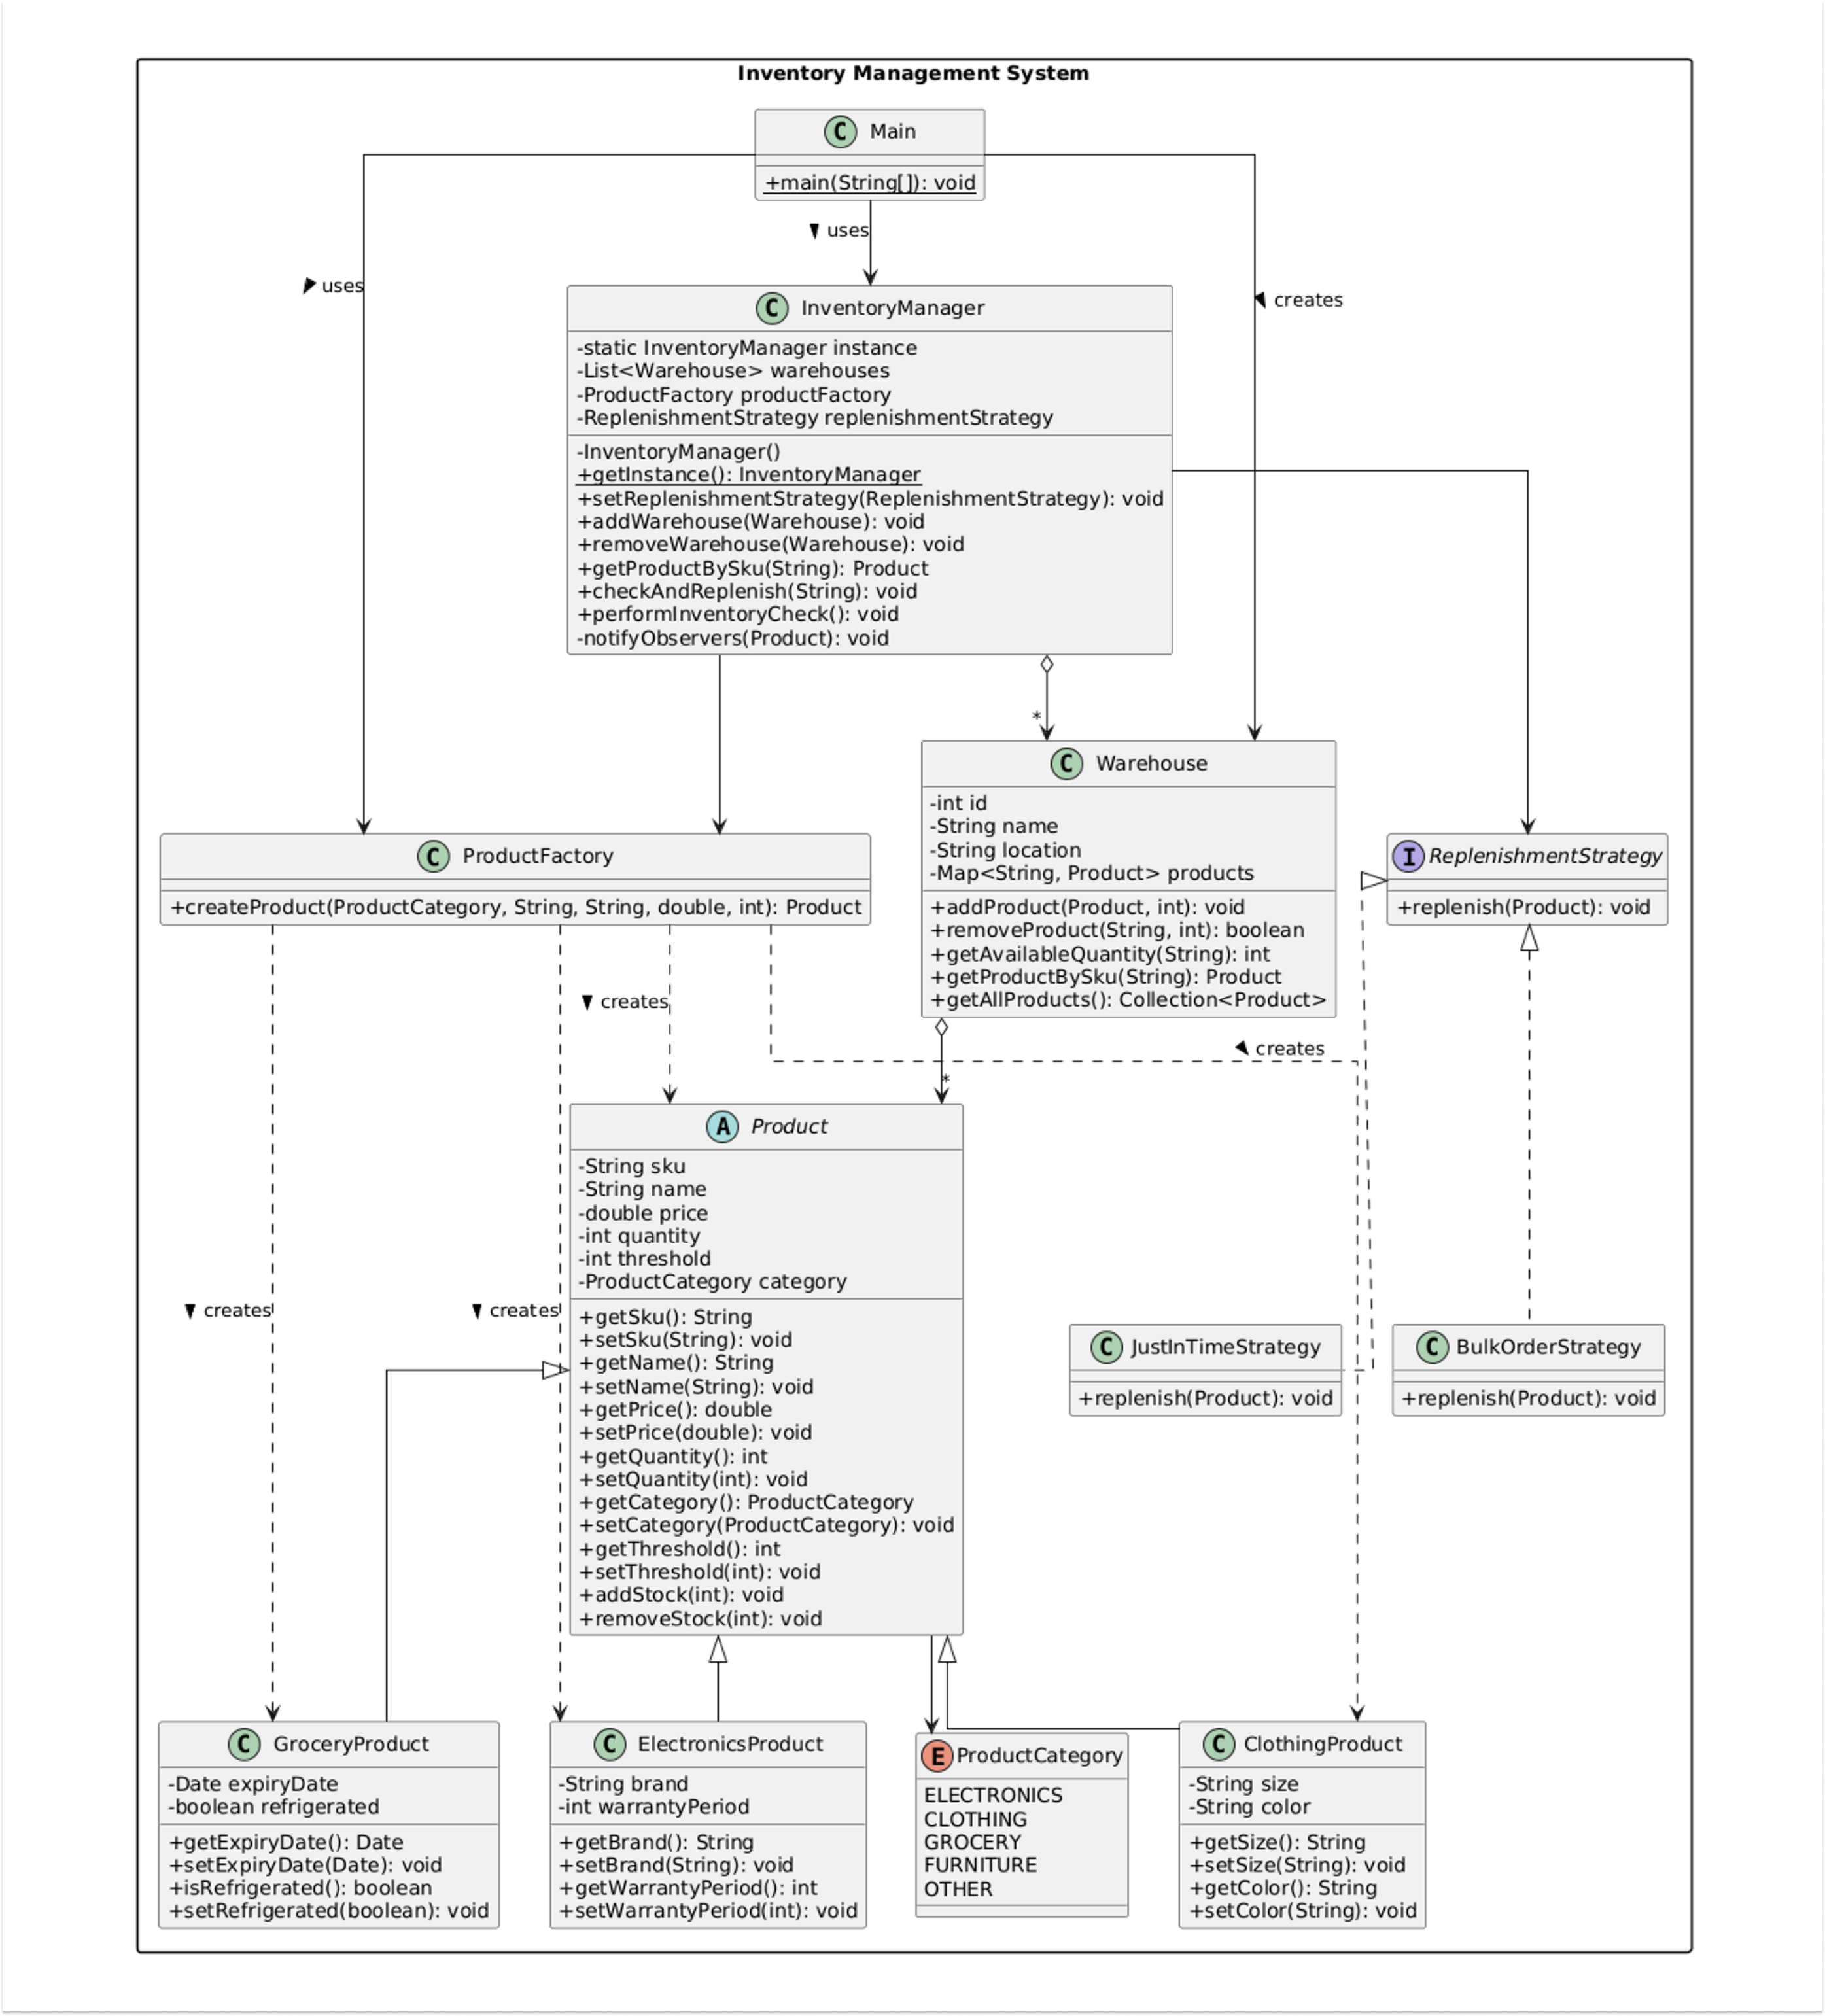

#### Factory Design Pattern for Product Creation

In [2]:
from abc import ABC, abstractmethod

class Product(ABC):
    def __init__(self):
        self.sku = None
        self.name = None
        self.price = 0.0
        self.quantity = 0
        self.threshold = 0
        self.productCategory = None

    def getSku(self):
        return self.sku

    def setSku(self, sku):
        self.sku = sku

    def getName(self):
        return self.name

    def setName(self, name):
        self.name = name

    def getPrice(self):
        return self.price

    def setPrice(self, price):
        self.price = price

    def getQuantity(self):
        return self.quantity

    def setQuantity(self, quantity):
        self.quantity = quantity

    def getThreshold(self):
        return self.quantity

    def setThreshold(self, threshold):
        self.threshold = threshold

    def getProductCategory(self):
        return self.productCategory

    def setProductCategory(self, productCategory):
        self.productCategory = productCategory

    def addStock(self, quantity: int):
        self.quantity += quantity

    def removeStock(self, quantity: int):
        self.quantity -= 1

class ClothingProduct(Product):
    def __init__(self, sku: str, name: str, price: float, quantity: int, threshold: int):
        super()
        self.setSku(sku)
        self.setName(name)
        self.setPrice(price)
        self.setQuantity(quantity)
        self.setThreshold(threshold)

    def getSize(self):
        return self.size

    def setSize(self, size):
        self.size = size

    def getColor(self):
        return self.color

    def setColor(self):
        return self.color

class ElectronicProduct(Product):
    def __init__(self, sku: str, name: str, price: float, quantity: int, threshold: int):
        super()
        self.setSku(sku)
        self.setName(name)
        self.setPrice(price)
        self.setQuantity(quantity)
        self.setThreshold(threshold)

    def getBrand(self):
        return self.brand

    def setBrand(self, brand):
        self.brand = brand

    def getWarranty(self):
        return self.warranty

    def setWarranty(self, warranty):
        self.warranty = warranty

class GroceryProduct(Product):
    def __init__(self, sku: str, name: str, price: float, quantity: int, threshold: int):
        super()
        self.setSku(sku)
        self.setName(name)
        self.setPrice(price)
        self.setQuantity(quantity)
        self.setThreshold(threshold)

    def getExpiryDate(self):
        return self.expiryDate

    def setExpiryDate(self, expiryDate):
        self.expiryDate = expiryDate

    def isRefrigerated(self):
        return self.refrigerated

    def setRefrigerated(self, refrigerated):
        self.refrigerated = refrigerated

class ProductFactory:
    def createProduct(self, category: ProductCategory, sku: str, name: str, price: float, quantity: int, threshold: int):
        if category == ProductCategory.ELECTRONICS:
            return ElectronicProduct(sku, name, price, quantity, threshold)
        if category == ProductCategory.CLOTHING:
            return ClothingProduct(sku, name, price, quantity, threshold)
        if category == ProductCategory.GROCERY:
            return GroceryProduct(sku, name, price, quantity, threshold)
        return ValueError('Unsupporeted product Category')

In [5]:

class WareHouse:
    def __init__(self, id: int, name: str, location: str):
        self.id = id
        self.name = name
        self.location = location
        self.products = {} # sku -> Product

    def getId(self):
        return self.id

    def setId(self, id):
        self.id = id

    def getName(self, name):
        return self.name

    def setName(self, name):
        self.name = name
    
    def getLocation(self):
        return self.location
    
    def setLocation(self, location):
        self.location = location

    def getAvailableQuanity(self, sku: str):
        if sku in self.products:
            return self.products[sku].getQuantity()
        return 0
    
    def addProduct(self, product: Product, quantity: int):
        sku = product.getSku()

        if sku in self.products:
            # Product exists, update quantity
            exisitingProduct = self.products[sku]
            exisitingProduct.addStock(quantity)
        else:
            # New product, add to the inventory
            product.setQuantity(quantity)
            self.products[sku] = product

        print(f"{quantity} units of {product.getName()} (SKU: {product.getSku()}) added to {self.name}. New Quanity: {self.getAvailableQuanity(sku)}")
        
    
    def removeProduct(self, sku: str, quantity: int):
        if sku in self.products:
            print(f'Error Product with {sku} not found in {self.name}!')
            return False

        product = self.products[sku]
        currentQuantity = product.getQuantity()

        if currentQuantity < quantity:
            print(f"Error: Insufficient inventory. Requested {quantity}, Available: {currentQuantity}")
            return False

        # Suffficeinty inventory to remove
        product.removeStock(quantity)
        print(f"{quantity} units of {product.getName()} (SKU: {product.getSku()}) removed from inventory ({self.name}). Remaining quanity: {product.getQuantity()}")

        # Remove product with zero quantity
        if product.getQuantity() == 0:
            self.products.pop(sku)
            print(f"Product {product.getName()} removed from inventory {self.name} as quantity is now zero.")

        return True
        
    def getProductBySku(self, sku: str):
        if sku not in self.products:
            print(f'Error! Product with {sku} not foud in Inventory {self.name}')
            return
        return self.products[sku]

    def getAllProducts(self):
        return self.products

#### Strategy pattern for product Relenishment

In [4]:
class ReplenishmentStrategy(ABC):
    @abstractmethod
    def replenish(self, product: Product):
        pass

class JustInTimeStrategy(ReplenishmentStrategy):
    def replenish(self, product: Product):
        # Implementing Just-In-Time replenishment logic
        print(f"Applying Just-In-Time replenishment for {product.getName()}")

class BulkOrderStrategy(ReplenishmentStrategy):
    def replenish(self, product: Product):
        # Implement Bulk order replenishment logic
        print(f"Applying BulkOrder replenishment for {product.getName()}")

#### Singleton Pattern for Inventory Manager

In [16]:
class InventoryManager:
    instance= None

    def __init__(self):
        if InventoryManager.instance != None:
            print('Use getInstance() method to get access the instance.')
            return
        # Initilaize dependencies
        self.wareHouses = []
        self.productFactory = ProductFactory()
        self.replenishmentStrategy = None

    @staticmethod
    def getInstance():
        if InventoryManager.instance == None:
            InventoryManager.instance = InventoryManager()
        return InventoryManager.instance

    # Strategy pattern method
    def setReplenishmentStrategt(self, replenishmentStrategy: ReplenishmentStrategy):
        self.replenishmentStrategy = replenishmentStrategy

    def addWareHouse(self, wareHouse: WareHouse):
        self.wareHouses.append(wareHouse)

    def removeWareHouse(self, wareHouse: WareHouse):
        self.wareHouses.remove(wareHouse)

    def getProductBySku(self, sku):
        for wareHouse in self.wareHouses:
            product = wareHouse.getProductBySku(sku)
            if product != None:
                return product

        return None

    def checkAndReplenish(self, sku: str):
        product = self.getProductBySku(sku)
        if product != None and product.getQuantity() < product.getThreshold():
            # If product is below threshold, notify observers
            # notifyObservers(product)
            # Apply current replenishment strategy
            if self.replenishmentStrategy != None:
                self.replenishmentStrategy.replenish(product)

    def performInventoryCheck(self):
        for wareHouse in self.wareHouses:
            for product in wareHouse.getAllProducts():
                if product.getQuantity() < product.getThreshold():
                    # notifyObserver(product)
                    if self.replenishmentStrategy != None:
                        self.replenishmentStrategy(product)
        

In [17]:
if __name__ == '__main__':
    # Get the singleton instance of inverntoryManager
    inventoryManager = InventoryManager().getInstance()

    # Create and add warehouses
    warehouse1 = WareHouse(1, "Warehouse1", "Location1")
    warehouse2 = WareHouse(2, "Warehouse2", "Location2")

    # Create prodcuts using productFactory
    productFactory = ProductFactory()
    laptop = productFactory.createProduct(ProductCategory.ELECTRONICS, 'SKU123', 'Laptop', 100000.0, 50, 25)
    tShirts = productFactory.createProduct(ProductCategory.CLOTHING, 'SKU456', 'T-shirt', 100.0, 200, 100)
    apple = productFactory.createProduct(ProductCategory.CLOTHING, 'SKU421', 'Apple', 2.0, 20, 10)

    # Add products to the warehouses
    warehouse1.addProduct(laptop, 15)
    warehouse1.addProduct(tShirts, 20)
    warehouse2.addProduct(apple, 50)

    # Set replenishment strategy to Just-In-Time
    inventoryManager.setReplenishmentStrategt(JustInTimeStrategy())

    # Perform inventory check and relenish if needed
    inventoryManager.performInventoryCheck()

    # Switch replenishment strategy to Bulk Order.
    inventoryManager.setReplenishmentStrategt(BulkOrderStrategy())

    # Replenish a specific product if needed
    inventoryManager.checkAndReplenish('SKU456')
    

15 units of Laptop (SKU: SKU123) added to Warehouse1. New Quanity: 15
20 units of T-shirt (SKU: SKU456) added to Warehouse1. New Quanity: 20
50 units of Apple (SKU: SKU421) added to Warehouse2. New Quanity: 50


- Interviewer: What makes your approach effective?
- Candidate:
    1. Scalability: The design allows easy addition of new product categoires, replenishment strategies, and warehoueses ensuring that the system can grow with the business.
    2. Modularity: Each component, such as product creation, inventory managament, and replenishment strategies, is handled separately, ensuring a clean and maintainable structure.
    3. Flexibility: The use of design patterns like Factory and Strategy allows seamless modifications and enchacements without affecting existing code. This enables the easy introduction of new features and strategies.
    4. Clarity: The architecture is intuitive, making it easy for developers to understand, implement, and extend when needed. This ensures that the system remains manitainable and adaptable over time.

#### Extensibility
- Observer Pattern for Inventory Alerts
- 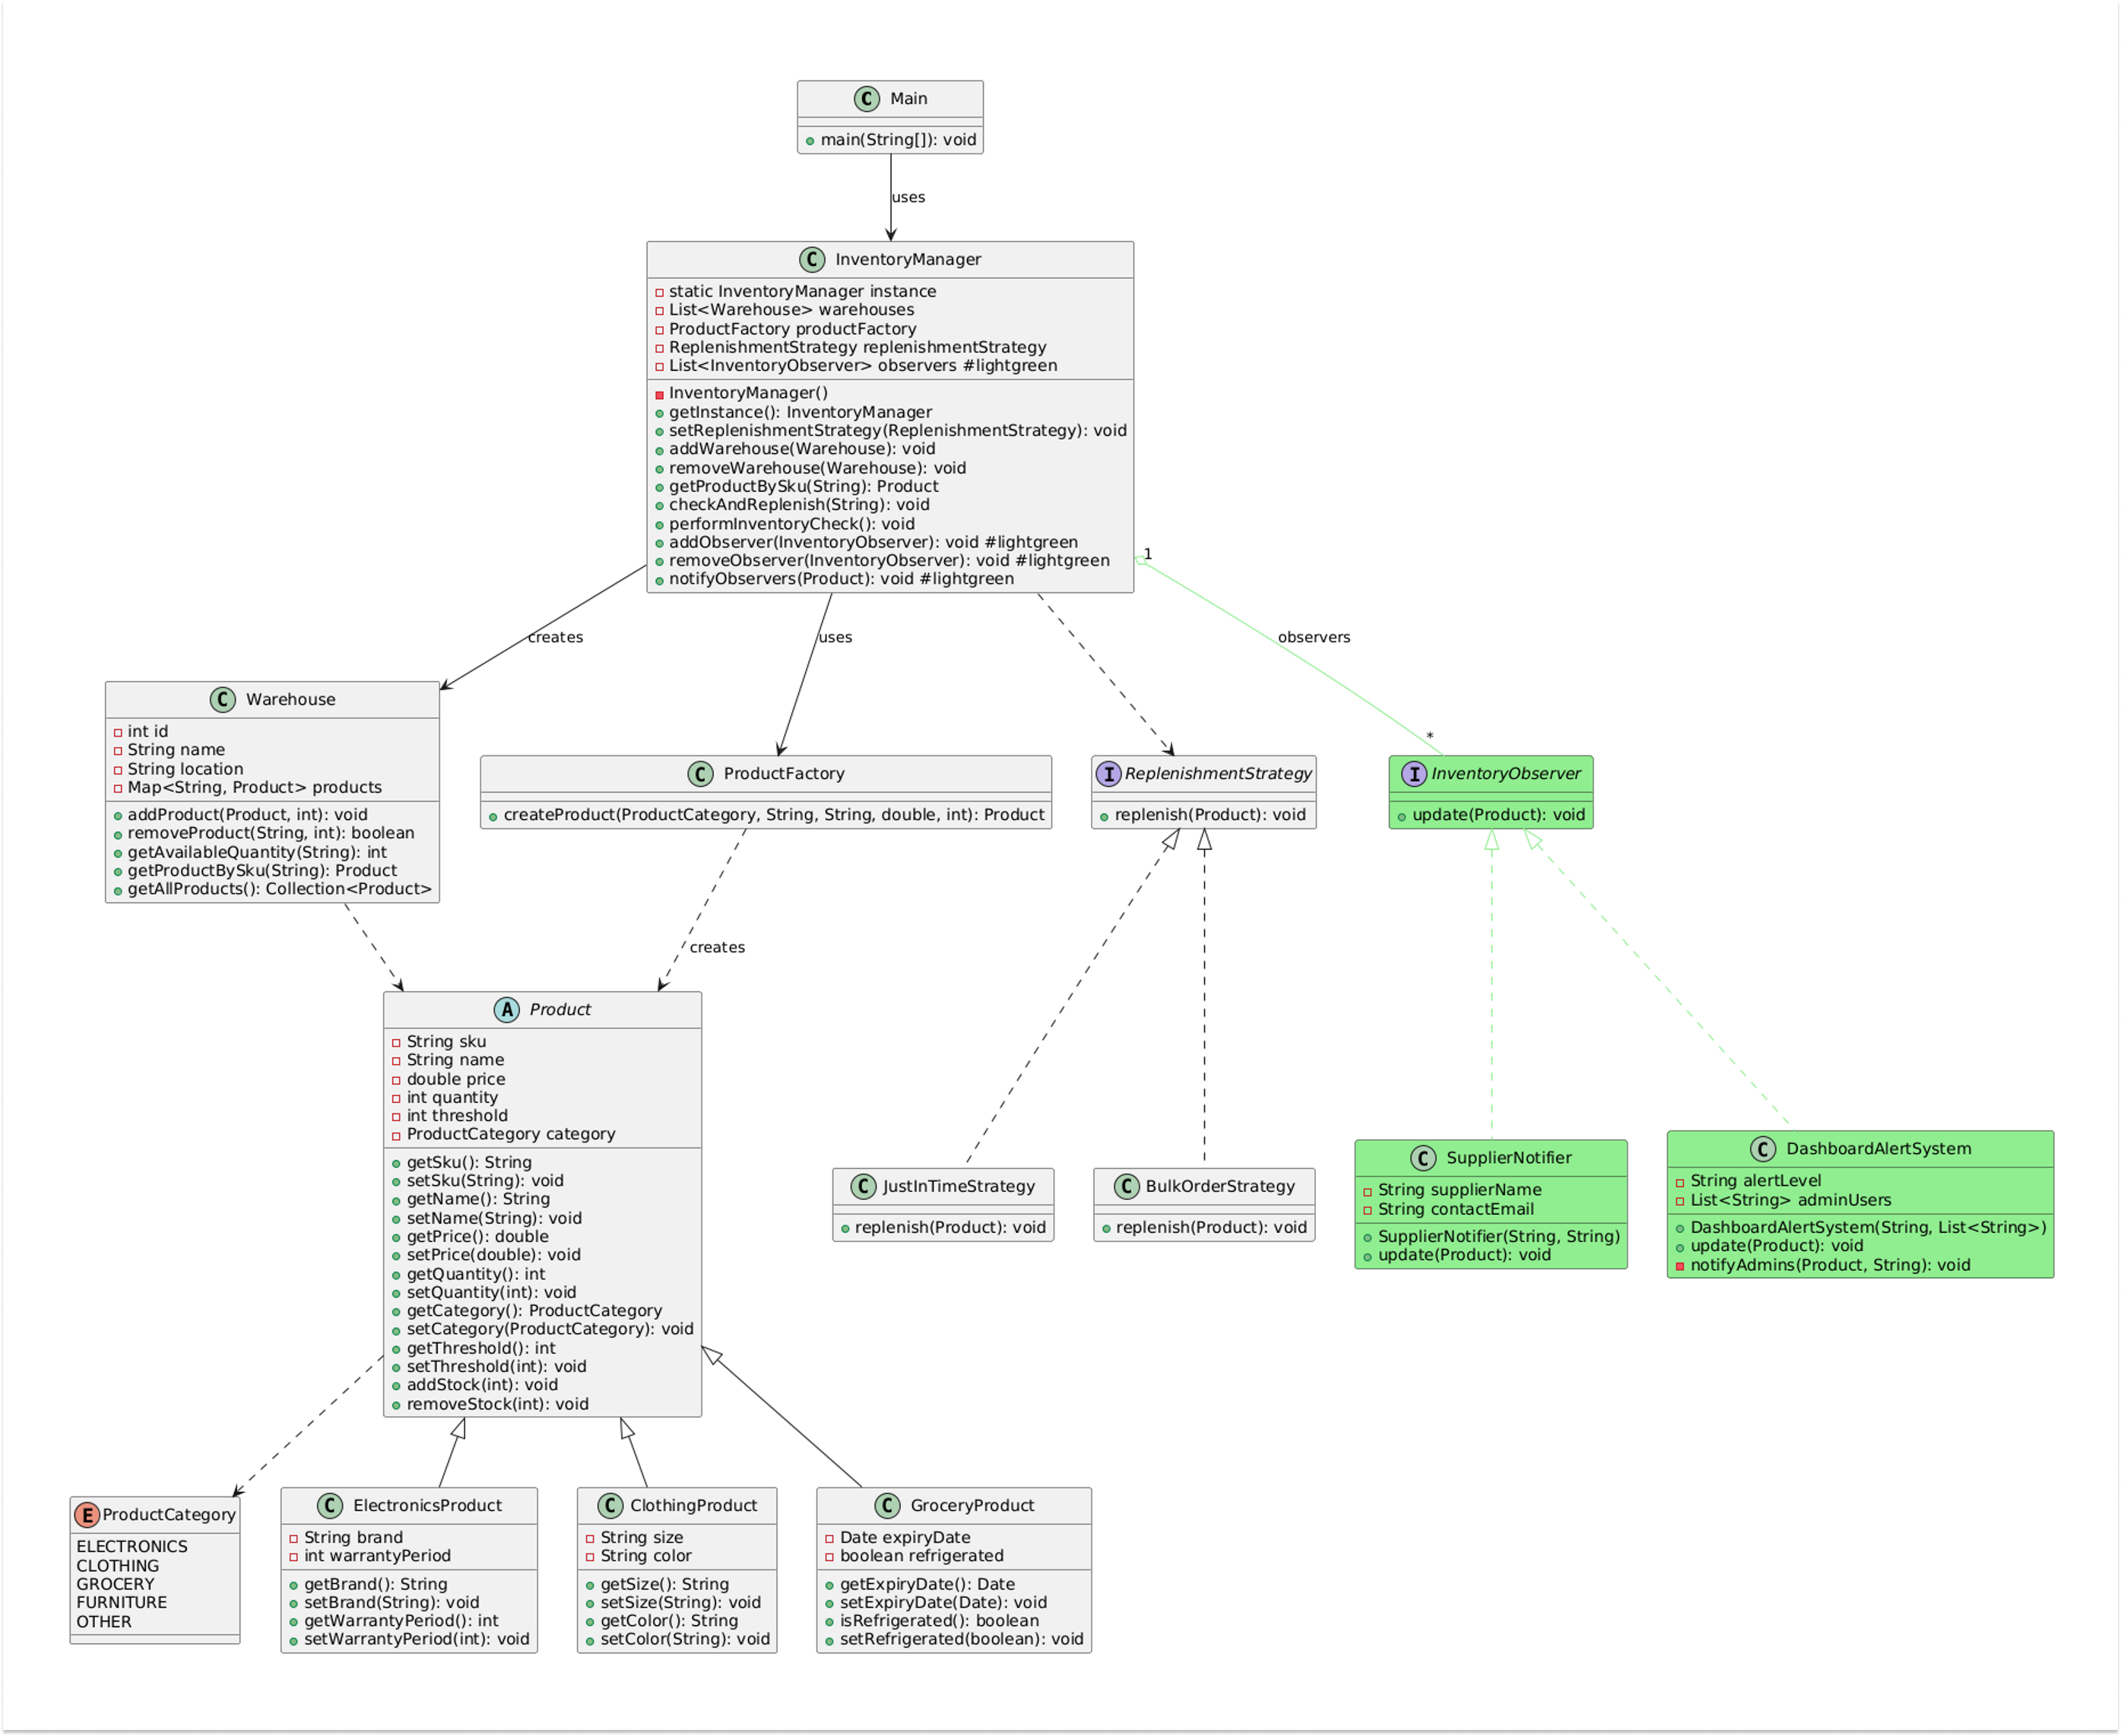

In [20]:
# Interface for observers
class InventoryObserver(ABC):
    @abstractmethod
    def update(self, product: Product):
        pass

# Concrete Listeners
# Supplier alert
class SupplierNotifier(InventoryObserver):
    def __init__(self, supplierName: str, contactEmail: str):
        self.supplierName = supplierName
        self.contactEmail = contactEmail

    def update(self, product: Product):
        if product.getQuantity() < product.getThreshold():
            # Send email notification to supplier
            print(f"Notification send to {supplierName} for low stock of {product.getName()}")

# DashBoard Alert System
class DashBoardAlertSystem(InventoryObserver):
    def __init__(self, alertLevel: str, adminUsers: [str]):
        self.alertLevel = alertLevel
        self.adminUsers = adminUsers

    def notifyAdmins(self, product: Product, level: str):
        for admin in self.adminUsers:
            print(f"Dashboard notification sent to admin: {admin}-{level} level alert for {product.getName()}")
    
    def update(self, product: Product):
        stockPercentage = (product.getQuantity() / product.getThreshold())*100

        if stockPercentage <= 25:
            # Critical Alert - Red notification
            print(f"CRITICAL ALERT: {product.getName()} stock critically low at {product.getQuantity()} units {stockPercentage} of threshold")
            notifyAdmins(product, 'CRITICAL')
        elif stockPercentage <= 50:
            print(f"WARNING ALERT: {product.getName()} stock low at {product.getQuantity()} units {stockPercentage} of threshold")
            notifyAdmins(product, 'WARNING')

In [21]:
class InventoryManager:
    instance= None

    def __init__(self):
        if InventoryManager.instance != None:
            print('Use getInstance() method to get access the instance.')
            return
        # Initilaize dependencies
        self.wareHouses = []
        self.observers = []
        self.productFactory = ProductFactory()
        self.replenishmentStrategy = None

    @staticmethod
    def getInstance():
        if InventoryManager.instance == None:
            InventoryManager.instance = InventoryManager()
        return InventoryManager.instance


    def addObserver(self, observer: InventoryObserver):
        self.observers.append(observer)

    def removeObserver(self, observer: InventoryObserver):
        self.observers.remove(observer)

    def notifyObservers(self, product):
        for observer in self.observers:
            observer.update(product)
    
    # Strategy pattern method
    def setReplenishmentStrategt(self, replenishmentStrategy: ReplenishmentStrategy):
        self.replenishmentStrategy = replenishmentStrategy

    def addWareHouse(self, wareHouse: WareHouse):
        self.wareHouses.append(wareHouse)

    def removeWareHouse(self, wareHouse: WareHouse):
        self.wareHouses.remove(wareHouse)

    def getProductBySku(self, sku):
        for wareHouse in self.wareHouses:
            product = wareHouse.getProductBySku(sku)
            if product != None:
                return product

        return None

    def checkAndReplenish(self, sku: str):
        product = self.getProductBySku(sku)
        if product != None and product.getQuantity() < product.getThreshold():
            # If product is below threshold, notify observers
            # notifyObservers(product)
            # Apply current replenishment strategy
            if self.replenishmentStrategy != None:
                self.replenishmentStrategy.replenish(product)

    def performInventoryCheck(self):
        for wareHouse in self.wareHouses:
            for product in wareHouse.getAllProducts():
                if product.getQuantity() < product.getThreshold():
                    # notifyObserver(product)
                    if self.replenishmentStrategy != None:
                        self.replenishmentStrategy(product)
        

### Addition of new product types:
- 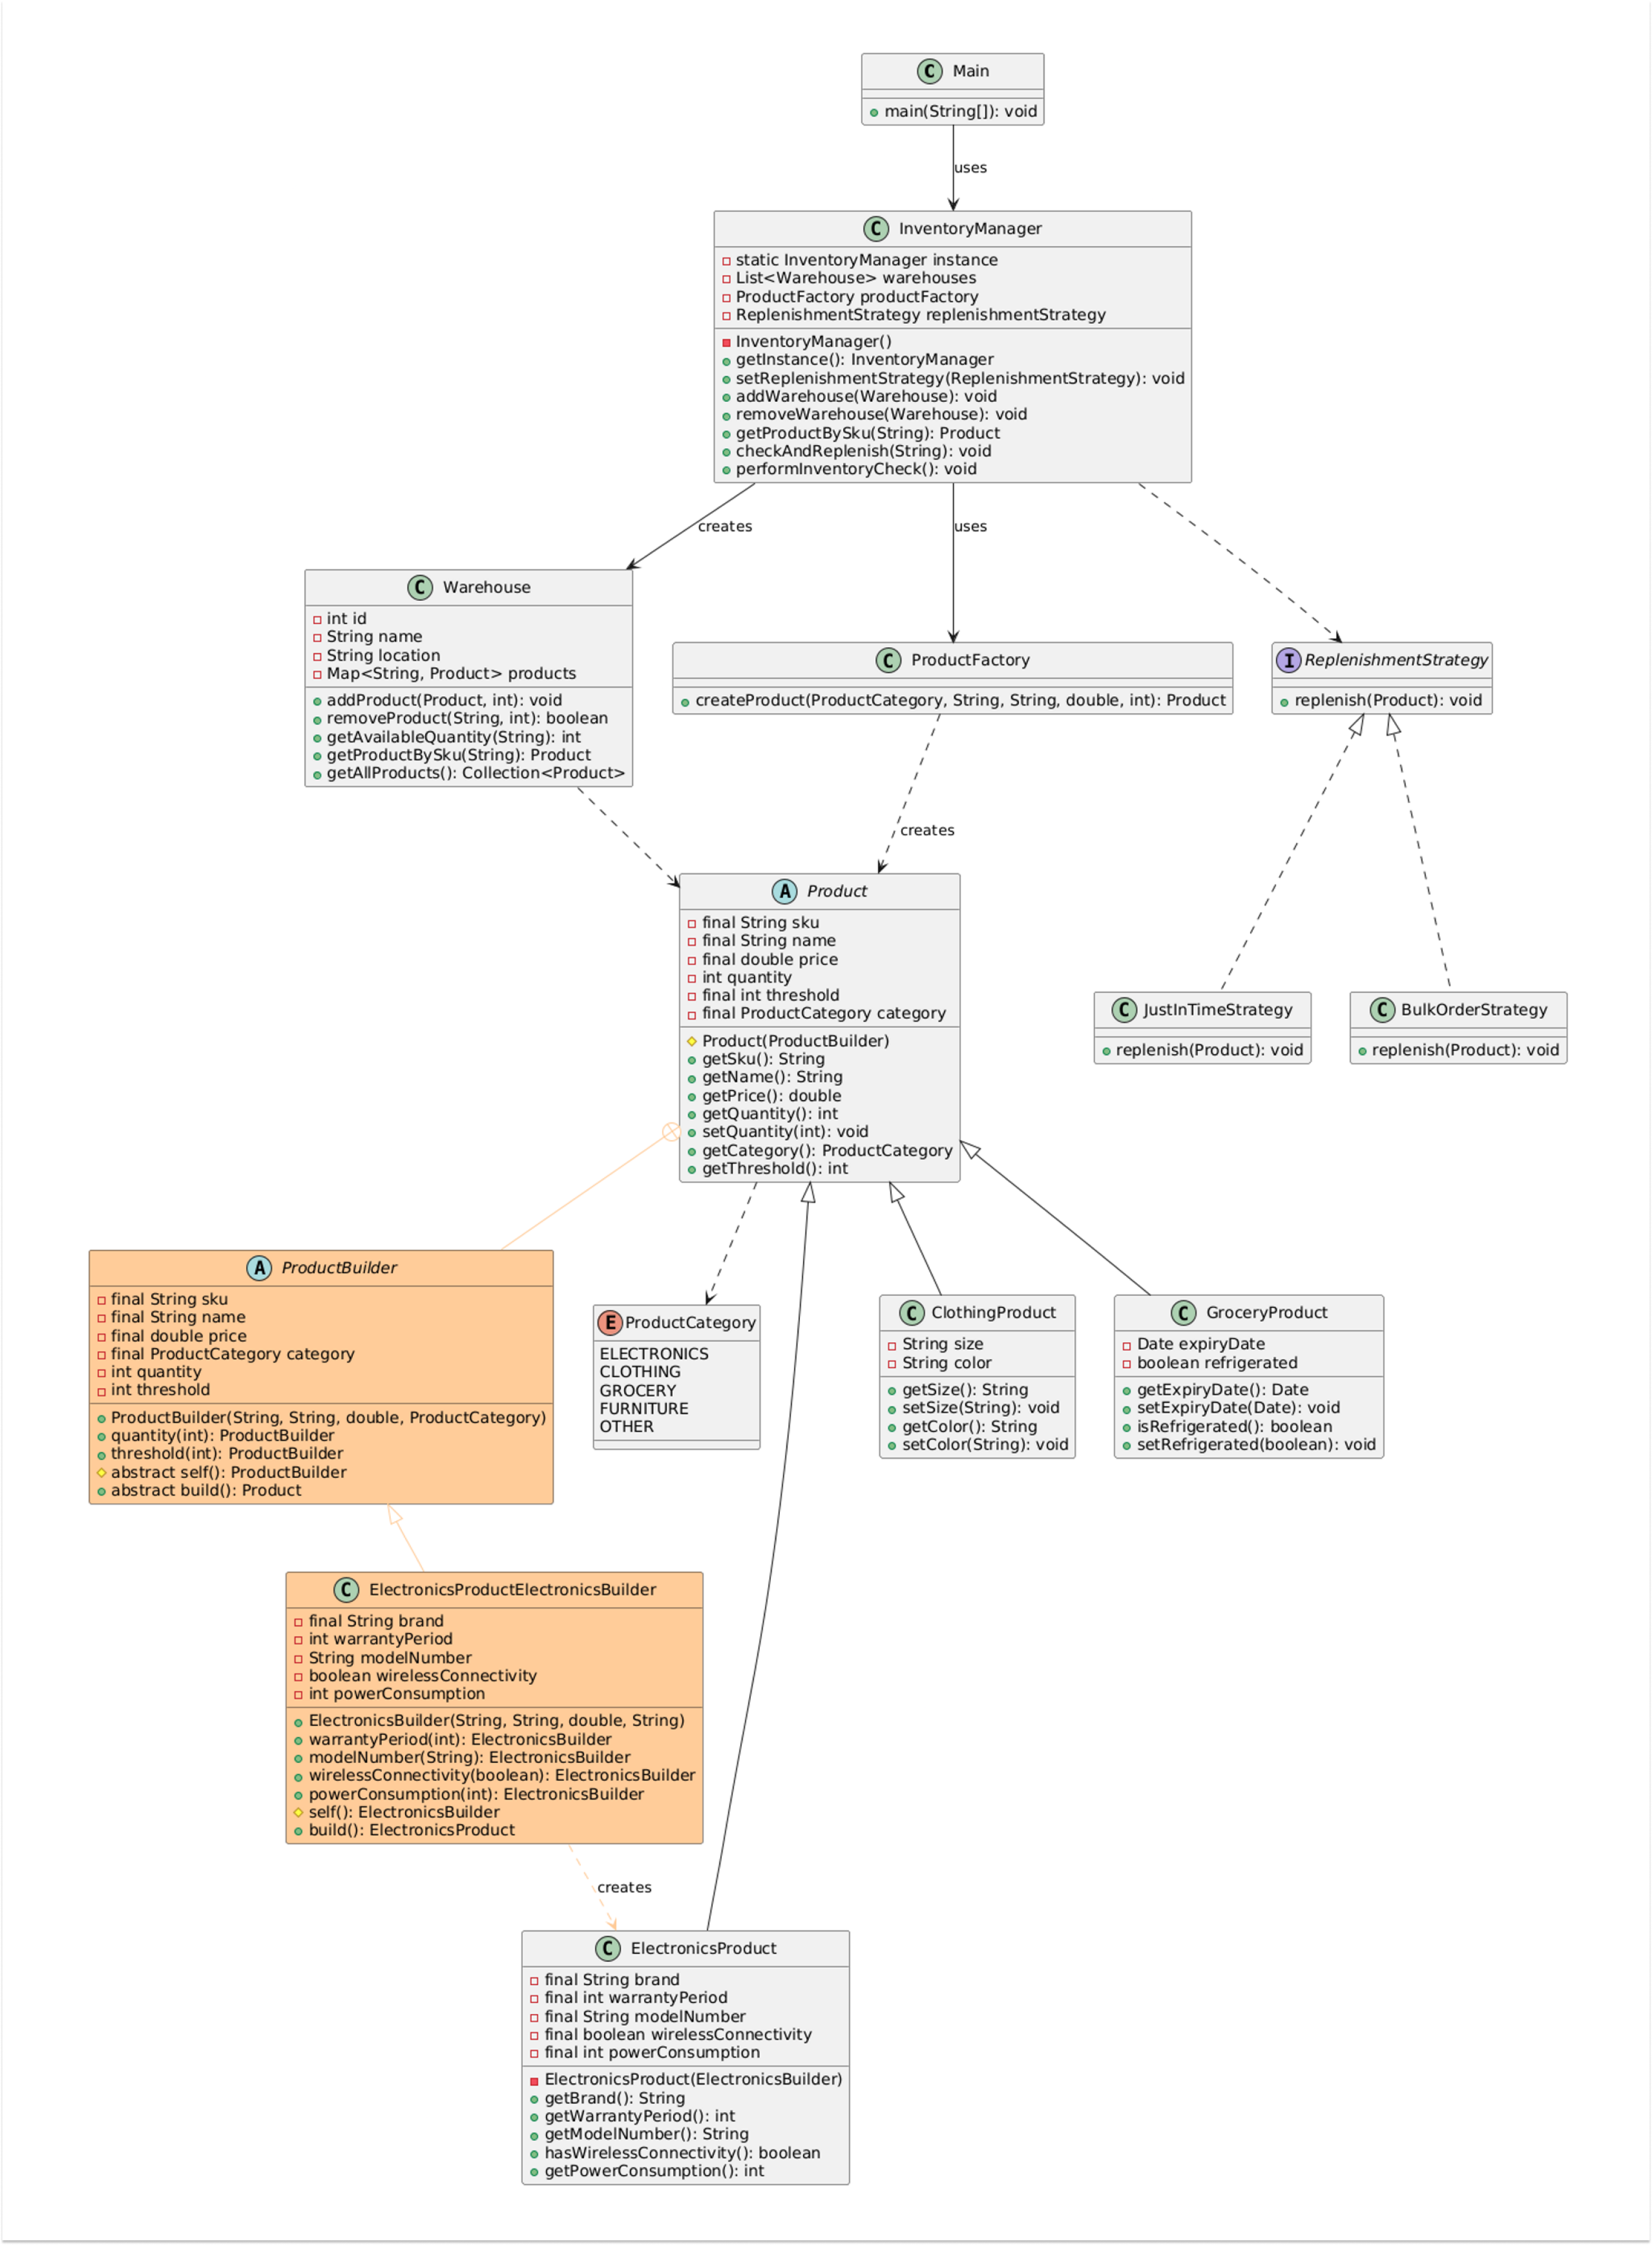